Text Classification is an example of supervised machine learning task. We have a labelled dataset containing text documents and their corresponding labels. An end-to-end text classification pipeline is composed of three main components:

1. Dataset Preparation: The first step is the dataset preparation which includes the process of loading a dataset and performing basic pre-processing. The dataset is then splitted into train and validation sets.
2. Feature Engineering: In this step the raw dataset is transformed into features which can be then fed into a machine learning model. 
3. Model Training: The final step is the model building step in which a machine learning model is trained on a labelled dataset. We would be using the Multinomial Naive Bayes, SVM, Logistic Regression, Xtereme Gradient Boosting, NN algorithms to categorize the Amazon reviews.

Understanding LSTM's

*  https://colah.github.io/
*  https://www.youtube.com/watch?v=8HyCNIVRbSU

Word Embedding Explained

*  http://jalammar.github.io/illustrated-word2vec/
*  https://ruder.io/word-embeddings-1/index.html
*  http://mccormickml.com/tutorials/

Word Embedding - Code Implementation in Keras

*   https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

*   https://keras.io/layers/embeddings/ - Refer the example. Arguments passed to ***Embedding()*** such as ***input_dim***: Size of the vocabulary and ***output_dim***: Dimension of the dense embedding. The Input to a Embedding layer is a 2D tensor with shape: (batch_size, sequence_length). The Output from a Embedding layer is a 3D tensor with shape: (batch_size, sequence_length, output_dim).

Implementation of LSTM in Keras

*  https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47

*  https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/

Keras Tokenizer method

*  https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do


In [ ]:
# !pip install textblob
# !pip install gensim
import numpy as np
import pandas, xgboost, textblob, string
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

from gensim.models import KeyedVectors

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing import text, sequence
from keras import optimizers
from keras import layers, models, optimizers

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 

In [ ]:
# uploaded

In [ ]:
# uploaded['corpus']

In [ ]:
'''
https://stackoverflow.com/questions/45482272/typeerror-a-bytes-like-object-is-required-not-str-python-2-to-3
https://stackoverflow.com/questions/48277354/typeerror-a-bytes-like-object-is-required-not-str-how-can-i-fix-this
The gist is that bytes are, well, bytes (groups of 8 bits without any further meaning attached), whereas characters are the things that make up strings of text. 
Encoding turns characters i.e str into bytes, and decoding turns bytes back into characters.
The encode() method encodes the string, using the specified encoding. If no encoding is specified, UTF-8 will be used.
So basically string data is converted to bytes data : data_bytes = data_string.decode("utf-8")
It's because type(uploaded['corpus']) returns bytes, just decode it using utf-8.

RUN THE BELOW CODE IN A SEPERATE CELL

# initializing string  
str = "geeksforgeeks"
  
# encoding string  
str_enc = str.encode() 
  
# printing the encoded string 
print ("The encoded string in base64 format is : ")  
print(str_enc)
  
# printing the original decoded string  
print ("The decoded string is : ")
print(str_enc.decode())

'''
print(type(uploaded['corpus']))
print(type(uploaded['corpus'].decode('utf-8')))

In [ ]:
'''
\n is what you do when you go to next line i.e ‘Enter Key’ and for tabs we use \t

RUN THE BELOW CODE IN A SEPERATE CELL

text = 'The oceans are warming faster than previously estimated, setting a new temperature record in 2018 in a trend that is damaging marine life, scientists said on Thursday.\nNew measurements, aided by an international network of 3,900 floats deployed in the oceans since 2000, showed more warming since 1971 than calculated by the latest UN assessment of climate change in 2013, they said.\nAnd “observational records of ocean heat content show that ocean warming is accelerating,” the authors in China and the US wrote in the journal Science of ocean waters down to 2,000 metres (6,600 ft).'
print(text)
print('--')
print(text.split('\n'))

RUN THE BELOW CODE IN A SEPERATE CELL

my_list = ['apple', 'banana', 'grapes', 'pear']
for counter, value in enumerate(my_list):
  print(counter, value)
'''

data = uploaded['corpus'].decode('utf-8')  #Converts bytes into characters.
ID = []
labels = []
texts = []
for counter, line in enumerate(data.split('\n')): #Iterates on every element of the list created by splitting data at \n
  ID.append(counter)
  content = line.split() #Split the line to separate label and text
  labels.append(content[0])
  texts.append(content[1:])
texts1 = [" ".join(line) for line in texts]

print(ID[0])
print(labels[0])
print(texts[0])
print(texts1[0])

0
__label__2
['Stuning', 'even', 'for', 'the', 'non-gamer:', 'This', 'sound', 'track', 'was', 'beautiful!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid.', 'game', 'music!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen!', '^_^']
Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes

                                                text       label
0  Stuning even for the non-gamer: This sound tra...  __label__2
1  The best soundtrack ever to anything.: I'm rea...  __label__2
2  Amazing!: This soundtrack is my favorite music...  __label__2
3  Excellent Soundtrack: I truly like this soundt...  __label__2
4  Remember, Pull Your Jaw Off The Floor After He...  __label__2
-------------------------------------------------------------


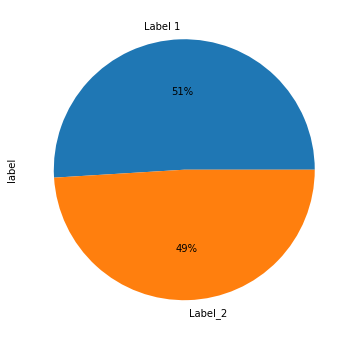

In [ ]:
# create a dataframe using texts and lables
trainDF = pandas.DataFrame()
trainDF['text'] = texts1
trainDF['label'] = labels

print(trainDF.head())
print('-------------------------------------------------------------')
names = ['Label 1', 'Label_2']
print(trainDF["label"].value_counts().plot(kind='pie', labels=names, autopct='%1.0f%%', subplots=True, figsize=(6, 6)))

In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = train_test_split(trainDF['text'], trainDF['label'])

# Now we label encode our target column so that it can be used in machine learning models
# https://www.youtube.com/watch?v=hJ2sKPj5Xn4
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

print(train_y)

[0 0 0 ... 1 0 1]


# 2) Feature Engineering

The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset. We will implement the following different ideas in order to obtain relevant features from our dataset.



1.   Count Vectors as features
2.   TF-IDF Vectors as features

*   Word level
*   N-Gram level
*   Character level

3.   Word Embeddings as features


In [ ]:
# create a count vectorizer object 
# transform the training and validation data using count vectorizer object
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

Word embedding is the modern way of representing words as vectors. The aim of word embedding is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. **Word2Vec** and **GloVe** are the two popular models to create word embedding of a text. These models takes a text corpus as input and produces the word vectors as output. In Bag-of-words model, a text (such as a sentence or a document) is represented as the bag of its words, disregarding grammar. We don't even consider the order of the words in a sentence. We make use of pre-trained word vectors from word2vec and glove in order to do text classification.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load the pre-trained word-embedding vectors 
glove_dir = '/content/gdrive/My Drive/Projects Colab/Glove'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# 3) Model Building

The final step in the text classification framework is to train a classifier using the features created in the previous step. There are many different choices of machine learning models which can be used to train a final model. We will implement following different classifiers for this purpose:




*   Naive Bayes Classifier

*   Linear Classifier

*   Support Vector Machine

*   Bagging Models

*   Boosting Models

*   Shallow Neural Networks

*   Deep Neural Networks

*   Convolutional Neural Network (CNN)

*   Long Short Term Model (LSTM)

*   Gated Recurrent Unit (GRU)

*   Bidirectional RNN

*   Recurrent Convolutional Neural Network (RCNN)

*   Other Variants of Deep Neural Networks

Lets implement these models and understand their details. The following function is a utility function which can be used to train a model. It accepts the classifier, feature_vector of training data, labels of training data and feature vectors of valid data as inputs. Using these inputs, the model is trained and accuracy score is computed.

In [ ]:
# Model Building
# Train a classifier using the features created in the previous step.

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        # predictions = predictions[:,1] This won't work bcoz it's output values are between 0 & 1 rather than strictly 0 & 1. 
        # argmax returns the position of the largest value. max returns the largest value.
        # https://stackoverflow.com/questions/36300334/understanding-argmax
        predictions = predictions.argmax(axis=-1)
        
    return metrics.accuracy_score(predictions, valid_y)

#### Naive Bayes

In [ ]:
# Naive Bayes

# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.8288
NB, WordLevel TF-IDF:  0.8388
NB, N-Gram Vectors:  0.8408
NB, CharLevel Vectors:  0.8104


#### Logistic Regression

In [ ]:
# Linear Classifier (Logistic Regression)

# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

# Linear Classifier on Glove Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_glove, train_y, xvalid_glove)
print ("LR, Glove Vectors: ", accuracy)

# Linear Classifier on word2vec Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_word2vec, train_y, xvalid_word2vec)
print ("LR, word2vec Vectors: ", accuracy)

LR, Count Vectors:  0.8632
LR, WordLevel TF-IDF:  0.866
LR, N-Gram Vectors:  0.8292
LR, CharLevel Vectors:  0.84
LR, Glove Vectors:  0.7368
LR, word2vec Vectors:  0.7988


#### Support vector machine


In [ ]:
# Implementing a SVM Model

# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)

# SVM on Glove Vectors
accuracy = train_model(svm.SVC(), xtrain_glove, train_y, xvalid_glove)
print ("SVM, Glove Vectors: ", accuracy)

# SVM on word2vec Vectors
accuracy = train_model(svm.SVC(), xtrain_word2vec, train_y, xvalid_word2vec)
print ("SVM, word2vec Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.5164
SVM, Glove Vectors:  0.7292
SVM, word2vec Vectors:  0.5164


#### Random Forest

In [ ]:
# Bagging Model
# Implementing a Random Forest Model

# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)

# RF on Glove Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_glove, train_y, xvalid_glove)
print ("RF, Glove Vectors: ", accuracy)

# RF on word2vec Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_word2vec, train_y, xvalid_word2vec)
print ("RF, word2vec Vectors: ", accuracy)

RF, Count Vectors:  0.7412
RF, WordLevel TF-IDF:  0.7532
RF, Glove Vectors:  0.6864
RF, word2vec Vectors:  0.7016


#### Gradient Boosting

In [ ]:
# Boosting Model
# Implementing Xtereme Gradient Boosting Model

# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)

Xgb, Count Vectors:  0.7924
Xgb, WordLevel TF-IDF:  0.7848
Xgb, CharLevel Vectors:  0.7948


#### Shallow Neural Networks

In [ ]:
def create_model_architecture(input_size):
    model = Sequential()

    # create input layer and hidden layer
    model.add(Dense(100, activation="relu", input_shape=(input_size, )))

    # create output layer
    # Output layer uses softmax activation.
    model.add(Dense(2, activation="softmax"))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
    return model 

# Output layer should have separate node for each possible outcome.
train_y = to_categorical(train_y)
#valid_y = to_categorical(valid_y)

# NN on Ngram Level TF IDF Vectors
classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print ("NN, Ngram Level TF IDF Vectors:",  accuracy)

# NN on Glove Vectors
classifier = create_model_architecture(xtrain_glove.shape[1])
accuracy = train_model(classifier, xtrain_glove, train_y, xvalid_glove, is_neural_net=True)
print ("NN, Glove Vectors:",  accuracy)

# NN on word2vec Vectors
classifier = create_model_architecture(xtrain_word2vec.shape[1])
accuracy = train_model(classifier, xtrain_word2vec, train_y, xvalid_word2vec, is_neural_net=True)
print ("NN, word2vec Vectors:",  accuracy)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
7500/7500 [==============================] - 4s 493us/step - loss: 0.4994
NN, Ngram Level TF IDF Vectors: 0.8308
Epoch 1/1
7500/7500 [==============================] - 1s 123us/step - loss: 0.6312
NN, Glove Vectors: 0.638
Epoch 1/1
7500/7500 [==============================] - 1s 129us/step - loss: 0.6019
NN, word2vec Vectors: 0.7652


**Recurrent Neural Network – LSTM**

In [ ]:
def create_rnn_lstm():
  # Add an Input Layer
  input_layer = layers.Input((70, ))

  # Add the word embedding Layer
  embedding_layer = layers.Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], trainable=False)(input_layer)
  embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

  # Add the LSTM Layer
  lstm_layer = layers.LSTM(100)(embedding_layer)

  # Add the output Layers
  output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
  output_layer1 = layers.Dropout(0.25)(output_layer1)
  output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

  # Compile the model
  model = models.Model(inputs=input_layer, outputs=output_layer2)
  model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
  
  return model

classifier = create_rnn_lstm()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-LSTM, Word Embeddings",  accuracy)

Epoch 1/1
7500/7500 [==============================] - 27s 4ms/step - loss: 0.6649
RNN-LSTM, Word Embeddings 0.5048


**Recurrent Neural Network – GRU**

In [ ]:
def create_rnn_gru():
  # Add an Input Layer
  input_layer = layers.Input((70, ))

  # Add the word embedding Layer
  embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
  embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

  # Add the GRU Layer
  lstm_layer = layers.GRU(100)(embedding_layer)

  # Add the output Layers
  output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
  output_layer1 = layers.Dropout(0.25)(output_layer1)
  output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

  # Compile the model
  model = models.Model(inputs=input_layer, outputs=output_layer2)
  model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
  return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-GRU, Word Embeddings",  accuracy)

**Bidirectional RNN**

In [ ]:
def create_bidirectional_rnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_bidirectional_rnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-Bidirectional, Word Embeddings",  accuracy)